**QUESTION 1**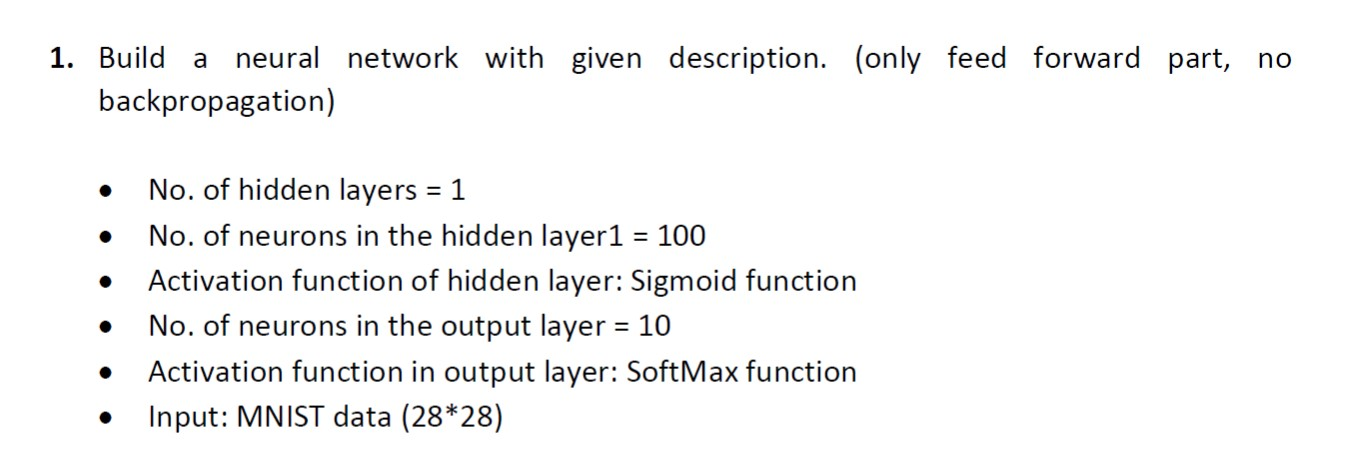




**Imports**

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

**Device Configuration**

In [2]:
device = 'cpu'

**Hyperparameters**

In [3]:
input_size = 784 # 28x28 images
hidden_size = 100
num_classes = 10
batch_size = 1

**MNIST Dataset**

In [4]:
train_data = torchvision.datasets.MNIST(root='/content/sample_data', train=True, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

**Checking the dataset**

In [5]:
print(train_data.train_data.shape)

torch.Size([60000, 28, 28])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [6]:
print(train_data.train_labels.shape)

torch.Size([60000])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [7]:
print(train_data.classes)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


**Neural Network**

In [8]:
class NeuralNetwork(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNetwork, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.sigmoid = nn.Sigmoid()
    self.l2 = nn.Linear(hidden_size, num_classes)
    self.softmax = nn.Softmax() 

  def forward(self, x):
    out = self.l1(x)
    out = self.sigmoid(out)
    out = self.l2(out)
    out = self.softmax(out)
    return out

model = NeuralNetwork(input_size, hidden_size, num_classes).to(device)

In [9]:
print(model.parameters)

<bound method Module.parameters of NeuralNetwork(
  (l1): Linear(in_features=784, out_features=100, bias=True)
  (sigmoid): Sigmoid()
  (l2): Linear(in_features=100, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)>


**Forward Pass and Outputs**

In [10]:
y_pred = []
y = []
for i, (image, label) in enumerate(train_loader):
    # resizing the tensors
    image = image.reshape(-1, 28*28)
    label = label

    # forward pass
    y.append(label)
    output = model(image)
    y_pred.append(torch.argmax(output, axis = 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


In [11]:
y_pred = np.array(y_pred)
y = np.array(y)
print(y_pred.shape)
print(y.shape)

(60000,)
(60000,)


**Looking into first 20 actual label and predicted label**

In [12]:
y[:20]

array([7, 4, 8, 9, 5, 3, 0, 1, 7, 5, 1, 2, 4, 2, 3, 7, 0, 8, 1, 0])

In [13]:
y_pred[:20]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**QUESTION 2**
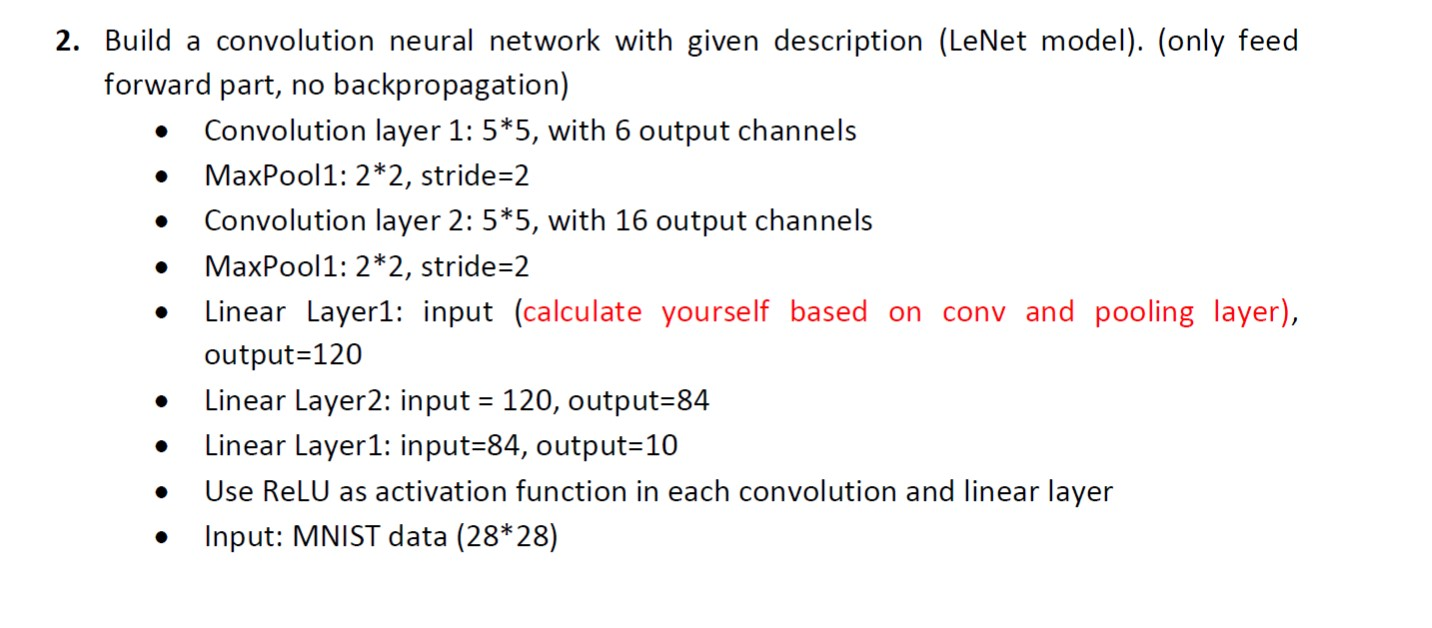

In [14]:
import torch.nn.functional as F

In [15]:
transforms = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])

train_data = torchvision.datasets.MNIST(root='/content/sample_data', train=True, transform=transforms, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_data, shuffle=True, batch_size=batch_size)

In [16]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(in_features= 400, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=84)
    self.fc3 = nn.Linear(in_features=84, out_features=10)

  def forward(self, x):
    x = self.pool1(F.relu(self.conv1(x)))
    x = self.pool2(F.relu(self.conv2(x)))
    x = x.view(-1, 400)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    return x

model = ConvNet().to(device)

In [17]:
print(model.parameters)

<bound method Module.parameters of ConvNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>


In [18]:
y_pred = []
y = []
for i, (image, label) in enumerate(train_loader):

    image = image.to(device)
    label = label.to(device)

    # forward pss
    output = model(image)

    y.append(label)
    output = model(image)
    y_pred.append(torch.argmax(output, axis = 1))

In [19]:
y_pred = np.array(y_pred)
y = np.array(y)
print(y_pred.shape)
print(y.shape)

(60000,)
(60000,)


**Looking into first 20 actual label and predicted label**

In [20]:
y[:20]

array([6, 8, 1, 0, 0, 2, 9, 0, 8, 2, 0, 1, 2, 5, 1, 2, 8, 5, 1, 7])

In [21]:
y_pred[:20]

array([7, 9, 9, 3, 3, 9, 9, 3, 7, 9, 3, 9, 9, 3, 9, 9, 9, 3, 9, 3])